<a href="https://colab.research.google.com/github/SamayJain24/Summer-School-on-AI-/blob/main/Project_1_MLSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Lodaing Dataset




In [ ]:
pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
#The MNIST images are grayscale and have dimensions 28x28.
#We can apply transformations like converting them to tensors and normalizing the pixel values.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [ ]:
#We have used datasets.MNIST class to download and load the dataset.
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3307196.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 482233.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 942333.28it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2913370.36it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#DataLoaders help in batching the data, shuffling it, and loading it in parallel using multiprocessing workers.
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# Visualising Dataset

In [ ]:
# Example: Iterate through the training data
# sum = 0
# for images, labels in train_loader:
#     print(images.shape, labels.shape)
#     sum +=1

# print(sum)



Batch size: 64
Image shape: torch.Size([1, 28, 28])
Labels shape: torch.Size([64])


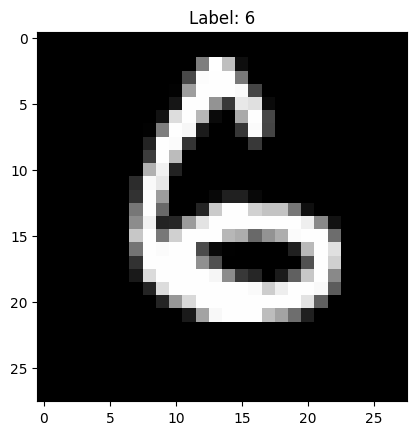

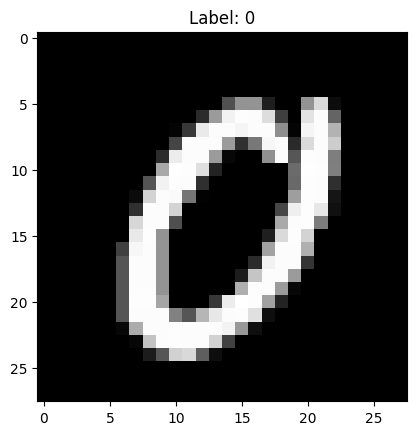

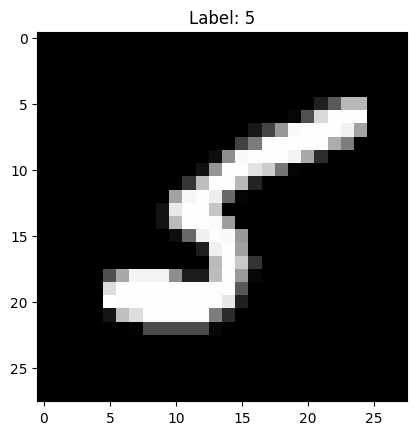

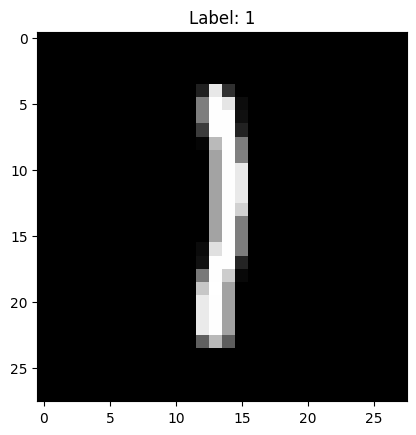

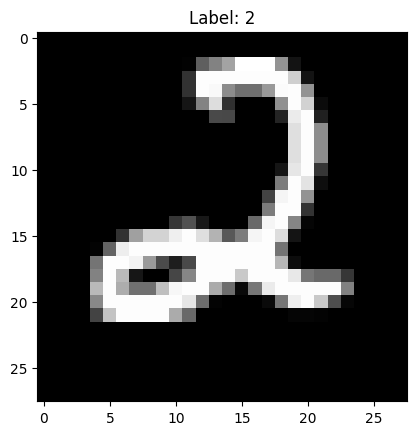

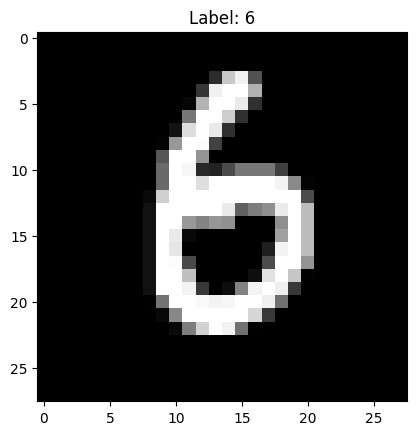

In [ ]:
def show_image(img, label):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

# Iterate through the training data and visualize some samples
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Print shape information
print(f'Batch size: {images.shape[0]}')
print(f'Image shape: {images.shape[1:]}')
print(f'Labels shape: {labels.shape}')

# Visualize a few images
for i in range(6):
    show_image(images[i].squeeze(), labels[i].item())

#  Defining Model

In [ ]:

import torch.nn as nn
import torch.nn.functional as F

# Model 1 : Model with full Connected Layers only
class FullyConnectedModel(nn.Module):
    def __init__(self):
        super(FullyConnectedModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
fc_model = FullyConnectedModel()
print(fc_model)


FullyConnectedModel(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
# Model 2 : Model with Convolution followed by Fully Connected Layers .
class ConvToFullyConnectedModel(nn.Module):
    def __init__(self):
        super(ConvToFullyConnectedModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
conv_fc_model = ConvToFullyConnectedModel()
print(conv_fc_model)


ConvToFullyConnectedModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
#Model 3 : Model with only Convolution Layers .
class FullyConvModel(nn.Module):
    def __init__(self):
        super(FullyConvModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 10, kernel_size=1, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.global_avg_pool(self.conv4(x))
        x = x.view(-1, 10)  # Flatten the input to (batch_size, 10)
        return x

# Instantiate the model
fully_conv_model = FullyConvModel()
print(fully_conv_model)


FullyConvModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 10, kernel_size=(1, 1), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=(1, 1))
)


In [ ]:
import torch.optim as optim

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(train_loader)

def evaluate(model, test_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return running_loss / len(test_loader), accuracy



In [ ]:
# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 10
learning_rate = 0.001

# Initialize models, criterion, and optimizer
models = {
    "Fully Connected": FullyConnectedModel().to(device),
    "Conv to FC": ConvToFullyConnectedModel().to(device),
    "Fully Conv": FullyConvModel().to(device)
}

criterion = nn.CrossEntropyLoss()
optimizers = {
    "Fully Connected": optim.Adam(models["Fully Connected"].parameters(), lr=learning_rate),
    "Conv to FC": optim.Adam(models["Conv to FC"].parameters(), lr=learning_rate),
    "Fully Conv": optim.Adam(models["Fully Conv"].parameters(), lr=learning_rate)
}



# Training and Evaluating Model

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name} model...")
    optimizer = optimizers[model_name]
    for epoch in range(num_epochs):
        train_loss = 0.0
        model.train()
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")

    # Evaluate on the test set
    test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
    print(f"{model_name} model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



Training Fully Connected model...
Epoch 1/10, Train Loss: 0.3012, Train Accuracy: 0.9065
Epoch 2/10, Train Loss: 0.1373, Train Accuracy: 0.9577
Epoch 3/10, Train Loss: 0.1057, Train Accuracy: 0.9670
Epoch 4/10, Train Loss: 0.0838, Train Accuracy: 0.9737
Epoch 5/10, Train Loss: 0.0709, Train Accuracy: 0.9772
Epoch 6/10, Train Loss: 0.0595, Train Accuracy: 0.9810
Epoch 7/10, Train Loss: 0.0558, Train Accuracy: 0.9818
Epoch 8/10, Train Loss: 0.0497, Train Accuracy: 0.9842
Epoch 9/10, Train Loss: 0.0436, Train Accuracy: 0.9861
Epoch 10/10, Train Loss: 0.0398, Train Accuracy: 0.9871
Fully Connected model - Test Loss: 0.0907, Test Accuracy: 0.9748
Training Conv to FC model...
Epoch 1/10, Train Loss: 0.1641, Train Accuracy: 0.9500
Epoch 2/10, Train Loss: 0.0458, Train Accuracy: 0.9858
Epoch 3/10, Train Loss: 0.0309, Train Accuracy: 0.9901
Epoch 4/10, Train Loss: 0.0235, Train Accuracy: 0.9924
Epoch 5/10, Train Loss: 0.0171, Train Accuracy: 0.9945
Epoch 6/10, Train Loss: 0.0146, Train Accuracy




# Model Summary

In [ ]:
pip install torchsummary


In [ ]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Move models to the same device as the input data
fully_connected_model = FullyConnectedModel().to(device)
conv_to_fc_model = ConvToFullyConnectedModel().to(device)
fully_conv_model = FullyConvModel().to(device)

# Visualize Fully Connected Model
summary(fully_connected_model, (1, 28, 28))

# Visualize Conv to FC Model
summary(conv_to_fc_model, (1, 28, 28))

# Visualize Fully Conv Model
summary(fully_conv_model, (1, 28, 28))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
            Linear-2                  [-1, 256]         131,328
            Linear-3                   [-1, 10]           2,570
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.04
Estimated Total Size (MB): 2.05
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1

In [ ]:
# Save all models in the dictionary
for model_name, model in models.items():
    torch.save(model.state_dict(), f'{model_name}_model.pth')


#Fine Tuning and K Fold Cross Validation

In [ ]:
import torch
import torch.nn as nn

def load_model(model_class, path, device):
    model = model_class()
    model.load_state_dict(torch.load(path))
    model.to(device)
    return model


In [ ]:
def fine_tune_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')
    return model


In [ ]:
from sklearn.model_selection import KFold
from torch.utils.data import Subset

def k_fold_cross_validation(model_class, dataset, k, criterion, optimizer_func, num_epochs, device):
    kf = KFold(n_splits=k, shuffle=True)
    fold_accuracies = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
        print(f'Fold {fold+1}/{k}')

        train_subset = Subset(dataset, train_idx)
        val_subset = Subset(dataset, val_idx)

        train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
        val_loader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False)

        model = model_class().to(device)
        optimizer = optimizer_func(model.parameters())

        model = fine_tune_model(model, train_loader, criterion, optimizer, num_epochs, device)

        val_accuracy = evaluate_model(model, val_loader, device)
        fold_accuracies.append(val_accuracy)

        print(f'Validation Accuracy for fold {fold+1}: {val_accuracy:.2f}%')

    avg_accuracy = sum(fold_accuracies) / k
    print(f'Average Validation Accuracy: {avg_accuracy:.2f}%')
    return avg_accuracy

def evaluate_model(model, val_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy


In [ ]:
model_paths = {
    "/content/Fully Connected_model.pth": FullyConnectedModel,
    "/content/Conv to FC_model.pth": ConvToFullyConnectedModel,
    "/content/Fully Conv_model.pth": FullyConvModel
}


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define optimizer function
def optimizer_func(params):
    return torch.optim.Adam(params, lr=0.001)

# Apply K-Fold Cross-Validation
for model_path, model_class in model_paths.items():
    print(f'Loading and fine-tuning model from {model_path}')
    model = load_model(model_class, model_path, device)
    avg_accuracy = k_fold_cross_validation(model_class, train_dataset, 5, criterion, optimizer_func, num_epochs, device)
    print(f'Average accuracy after K-fold CV: {avg_accuracy:.2f}%')


Loading and fine-tuning model from /content/Fully Connected_model.pth
Fold 1/5
Epoch [1/5], Loss: 0.31030006007353467
Epoch [2/5], Loss: 0.1506606142974148
Epoch [3/5], Loss: 0.11375689183206608
Epoch [4/5], Loss: 0.09269567628173779
Epoch [5/5], Loss: 0.08329682471589574
Validation Accuracy for fold 1: 97.28%
Fold 2/5
Epoch [1/5], Loss: 0.30894092238942783
Epoch [2/5], Loss: 0.15105801494667928
Epoch [3/5], Loss: 0.11367034746039038
Epoch [4/5], Loss: 0.09454790818000523
Epoch [5/5], Loss: 0.08160828557036197
Validation Accuracy for fold 2: 96.26%
Fold 3/5
Epoch [1/5], Loss: 0.30763893184624613
Epoch [2/5], Loss: 0.1516822452491615
Epoch [3/5], Loss: 0.11228124544265058
Epoch [4/5], Loss: 0.09546806018000158
Epoch [5/5], Loss: 0.07667872048107287
Validation Accuracy for fold 3: 97.06%
Fold 4/5
Epoch [1/5], Loss: 0.30970236468097817
Epoch [2/5], Loss: 0.15157743795029818
Epoch [3/5], Loss: 0.11678763825977997
Epoch [4/5], Loss: 0.0955523043582992
Epoch [5/5], Loss: 0.08066871832303392


# DOG CAT CLASSIFICATION


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:11<00:00, 181MB/s]
100% 1.06G/1.06G [00:11<00:00, 95.6MB/s]


In [ ]:
#As the data is in zip format so to unzipping it
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

def load_data(train_dir, test_dir):
    # Define transformations including resizing
    transform = transforms.Compose([
        transforms.Resize((28, 28)),  # Resize to 256x256 or change to (128, 128) if needed
        transforms.Grayscale(),  # Convert to grayscale to match MNIST model input
        transforms.ToTensor()
    ])

    # Load the training dataset
    train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Load the test dataset
    test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Verify the dataset classes
    classes = train_dataset.classes
    print(f'Classes: {classes}')

    return train_loader, test_loader, classes

# Example usage:
train_folder = '/content/train'        # Provide the path to the train folder containing Dogs and Cats subfolders
test_folder = '/content/test'    # Provide the path to the test folder containing Dogs and Cats subfolders

train_loader, test_loader, classes = load_data(train_folder, test_folder)


Classes: ['cats', 'dogs']


In [ ]:
# Load the pre-trained model
pretrained_model_path = "/content/Conv to FC_model.pth"
pretrained_model = torch.load(pretrained_model_path)

# Initialize the custom model
custom_model = ConvToFullyConnectedModel()

# Transfer weights from the pre-trained model to the custom model
custom_model.conv1.weight.data = pretrained_model['conv1.weight']
custom_model.conv1.bias.data = pretrained_model['conv1.bias']
custom_model.conv2.weight.data = pretrained_model['conv2.weight']
custom_model.conv2.bias.data = pretrained_model['conv2.bias']
custom_model.fc1.weight.data = pretrained_model['fc1.weight']
custom_model.fc1.bias.data = pretrained_model['fc1.bias']
custom_model.fc2.weight.data = pretrained_model['fc2.weight']
custom_model.fc2.bias.data = pretrained_model['fc2.bias']


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming you have already defined train_loader and test_loader

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(custom_model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    custom_model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = custom_model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print average training loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss}, Training Accuracy: {epoch_accuracy}")

# Testing the model
custom_model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = custom_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total}%")


Epoch 1/10, Training Loss: 0.4217037736415863, Training Accuracy: 0.8046
Epoch 2/10, Training Loss: 0.3744279900074005, Training Accuracy: 0.8337
Epoch 3/10, Training Loss: 0.3244136684536934, Training Accuracy: 0.85725
Epoch 4/10, Training Loss: 0.27388003512620923, Training Accuracy: 0.88415
Epoch 5/10, Training Loss: 0.22610623705387115, Training Accuracy: 0.90535
Epoch 6/10, Training Loss: 0.17771173756122588, Training Accuracy: 0.9292
Epoch 7/10, Training Loss: 0.13819639618694782, Training Accuracy: 0.948
Epoch 8/10, Training Loss: 0.10663660086989403, Training Accuracy: 0.9609
Epoch 9/10, Training Loss: 0.08642974868565798, Training Accuracy: 0.9677
Epoch 10/10, Training Loss: 0.06237221371605992, Training Accuracy: 0.97965
Test Accuracy: 76.12%
